In [1]:
import constants as c
import tester as t

b_results = t.run(c.BB, c.NK_FILE_PREFIX, 27)
d_results = t.run(c.DYNAMIC, c.NK_FILE_PREFIX, 27)
g_results = t.run(c.GREEDY, c.NK_FILE_PREFIX)
r_results = t.run(c.REDUX, c.NK_FILE_PREFIX)

[N=4] TIME: 8.51160 ms, AVG_TIME: 0.01702 ms, MAX_TIME: 0.04220 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=10] TIME: 70.38810 ms, AVG_TIME: 0.14078 ms, MAX_TIME: 0.88130 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=15] TIME: 548.80300 ms, AVG_TIME: 1.09761 ms, MAX_TIME: 9.61810 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=20] TIME: 5181.96120 ms, AVG_TIME: 10.36392 ms, MAX_TIME: 128.87840 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=22] TIME: 13290.77650 ms, AVG_TIME: 26.58155 ms, MAX_TIME: 432.29490 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=25] TIME: 59281.82070 ms, AVG_TIME: 118.56364 ms, MAX_TIME: 1276.37600 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=27] TIME: 135583.61520 ms, AVG_TIME: 271.16723 ms, MAX_TIME: 3913.82270 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=4] TIME: 84.55250 ms, AVG_TIME: 0.16911 ms, MAX_TIME: 0.80020 ms, ERRORS: 0/500, AVG_ERROR: 0.00000, M

In [2]:
b_avg_t, d_avg_t, g_avg_t, r_avg_t = [], [], [], []

for b_result in b_results:
  b_avg_t.append(float(b_result[2]))

for d_result in d_results:
  d_avg_t.append(float(d_result[2]))

for g_result in g_results:
  g_avg_t.append(float(g_result[2]))

for r_result in r_results:
  r_avg_t.append(float(r_result[2]))

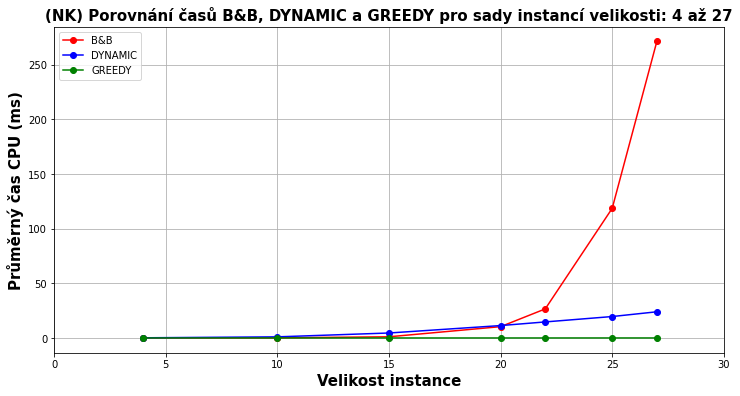

In [34]:
import numpy as np
import matplotlib.pyplot as plt

limit = 7
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, c.NUM_OF_THINGS[limit])

plt.title("(NK) Porovnání časů B&B, DYNAMIC a GREEDY pro sady instancí velikosti: 4 až 27", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrný čas CPU (ms)", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS[0:limit], b_avg_t[0:limit], marker = "o", linestyle = "solid", color = "red", label = "B&B")
plt.plot(c.NUM_OF_THINGS[0:limit], d_avg_t[0:limit], marker = "o", linestyle = "solid", color = "blue", label = "DYNAMIC")
plt.plot(c.NUM_OF_THINGS[0:limit], g_avg_t[0:limit], marker = "o", linestyle = "solid", color = "green", label = "GREEDY")

plt.grid()
plt.legend()
plt.show()

In [17]:
import pandas as pd

df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS[0:limit],
  "Průměrný čas CPU pro B&B (ms)": b_avg_t[0:limit],
  "Průměrný čas CPU pro DYNAMIC (ms)": d_avg_t[0:limit],
  "Průměrný čas CPU pro GREEDY (ms)": g_avg_t[0:limit]
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrný čas CPU pro B&B (ms),Průměrný čas CPU pro DYNAMIC (ms),Průměrný čas CPU pro GREEDY (ms)
4,0.017020,0.169110,0.006800
10,0.140780,1.036560,0.011520
15,1.097610,4.557650,0.018900
20,10.363920,11.347250,0.018110
22,26.581550,14.685610,0.019560
25,118.563640,19.612040,0.028430
27,271.167230,23.958630,0.028130


In [18]:
g_avg_e, r_avg_e, g_max_e, r_max_e = [], [], [], []

for g_result in g_results:
  g_avg_e.append(float(g_result[5]))
  g_max_e.append(float(g_result[6]))

for r_result in r_results:
  r_avg_e.append(float(r_result[5]))
  r_max_e.append(float(r_result[6]))

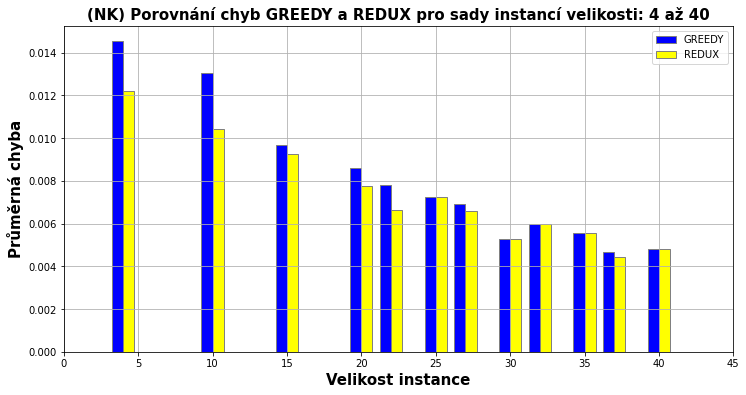

In [36]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

barWidth = 0.75
x1 = [x - barWidth / 2 for x in c.NUM_OF_THINGS]
x2 = [x + barWidth for x in x1]

plt.title("(NK) Porovnání chyb GREEDY a REDUX pro sady instancí velikosti: 4 až 40", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrná chyba", fontweight = "bold", fontsize = 15)

plt.bar(x1, g_avg_e, width = barWidth, color = "blue", edgecolor = "grey", label = "GREEDY")
plt.bar(x2, r_avg_e, width = barWidth, color = "yellow", edgecolor = "grey", label = "REDUX")

plt.grid()
plt.legend()
plt.show()

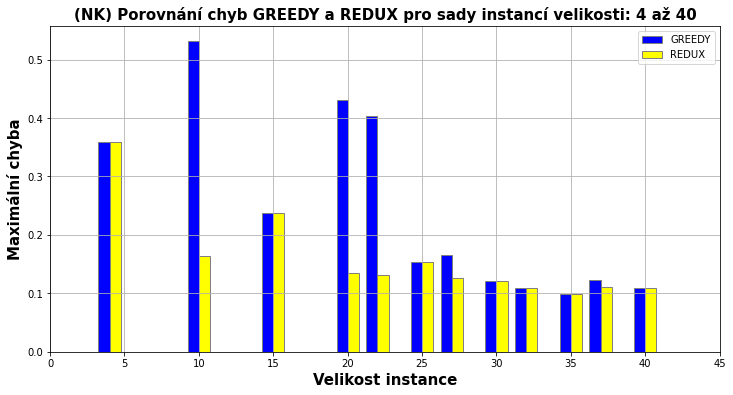

In [38]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

barWidth = 0.75
x1 = [x - barWidth / 2 for x in c.NUM_OF_THINGS]
x2 = [x + barWidth for x in x1]

plt.title("(NK) Porovnání chyb GREEDY a REDUX pro sady instancí velikosti: 4 až 40", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Maximální chyba", fontweight = "bold", fontsize = 15)

plt.bar(x1, g_max_e, width = barWidth, color = "blue", edgecolor = "grey", label = "GREEDY")
plt.bar(x2, r_max_e, width = barWidth, color = "yellow", edgecolor = "grey", label = "REDUX")

plt.grid()
plt.legend()
plt.show()

In [42]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS,
  "Průměrná chyba pro GREEDY": g_avg_e,
  "Průměrná chyba pro REDUX": r_avg_e,
  "Maximální chyba pro GREEDY": g_max_e,
  "Maximální chyba pro REDUX": r_max_e
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrná chyba pro GREEDY,Průměrná chyba pro REDUX,Maximální chyba pro GREEDY,Maximální chyba pro REDUX
4,0.014530,0.012190,0.359190,0.359190
10,0.013040,0.010440,0.531450,0.164210
15,0.009680,0.009260,0.236830,0.236830
20,0.008600,0.007740,0.430050,0.135560
22,0.007790,0.006630,0.403850,0.131810
25,0.007250,0.007250,0.152880,0.152880
27,0.006920,0.006590,0.164760,0.126880
30,0.005290,0.005290,0.121020,0.121020
32,0.005960,0.005960,0.109730,0.109730
35,0.005580,0.005580,0.099640,0.099640


In [43]:
f1_results = t.run(c.FPTAS, c.NK_FILE_PREFIX, 27, 0.1)
f5_results = t.run(c.FPTAS, c.NK_FILE_PREFIX, 27, 0.5)
f9_results = t.run(c.FPTAS, c.NK_FILE_PREFIX, 27, 0.9)

[N=4] TIME: 316.49010 ms, AVG_TIME: 0.63298 ms, MAX_TIME: 14.24650 ms, ERRORS: 9/500, AVG_ERROR: 0.00019, MAX_ERROR: 0.02079
[N=10] TIME: 3239.90180 ms, AVG_TIME: 6.47980 ms, MAX_TIME: 46.81490 ms, ERRORS: 17/500, AVG_ERROR: 0.00003, MAX_ERROR: 0.00213
[N=15] TIME: 10064.14410 ms, AVG_TIME: 20.12829 ms, MAX_TIME: 138.12900 ms, ERRORS: 17/500, AVG_ERROR: 0.00002, MAX_ERROR: 0.00152
[N=20] TIME: 26257.57260 ms, AVG_TIME: 52.51515 ms, MAX_TIME: 504.24570 ms, ERRORS: 11/500, AVG_ERROR: 0.00001, MAX_ERROR: 0.00194
[N=22] TIME: 29758.15240 ms, AVG_TIME: 59.51630 ms, MAX_TIME: 182.26470 ms, ERRORS: 18/500, AVG_ERROR: 0.00001, MAX_ERROR: 0.00076
[N=25] TIME: 45336.53400 ms, AVG_TIME: 90.67307 ms, MAX_TIME: 519.87600 ms, ERRORS: 8/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00030
[N=27] TIME: 58265.73210 ms, AVG_TIME: 116.53146 ms, MAX_TIME: 777.65890 ms, ERRORS: 14/500, AVG_ERROR: 0.00000, MAX_ERROR: 0.00051
[N=4] TIME: 70.01010 ms, AVG_TIME: 0.14002 ms, MAX_TIME: 2.36590 ms, ERRORS: 41/500, AVG_ERR

In [44]:
f1_avg_t, f1_max_e, f5_avg_t, f5_max_e, f9_avg_t, f9_max_e = [], [], [], [], [], []

for f1_result in f1_results:
  f1_avg_t.append(float(f1_result[2]))
  f1_max_e.append(float(f1_result[6]))

for f5_result in f5_results:
  f5_avg_t.append(float(f5_result[2]))
  f5_max_e.append(float(f5_result[6]))

for f9_result in f9_results:
  f9_avg_t.append(float(f9_result[2]))
  f9_max_e.append(float(f9_result[6]))

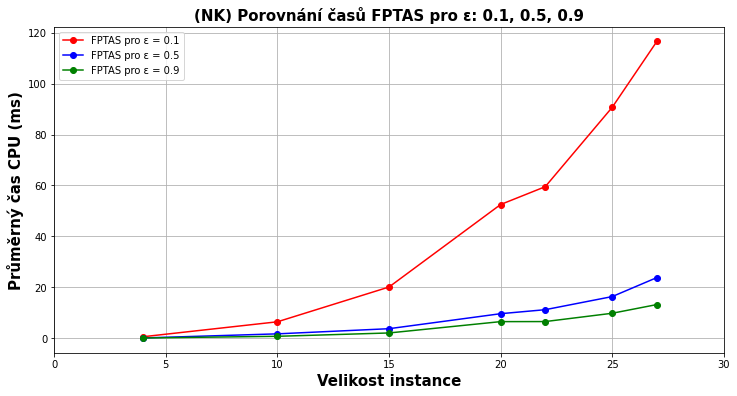

In [47]:
limit = 7
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, c.NUM_OF_THINGS[limit])

plt.title("(NK) Porovnání časů FPTAS pro ε: 0.1, 0.5, 0.9", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrný čas CPU (ms)", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS[0:limit], f1_avg_t[0:limit], marker = "o", linestyle = "solid", color = "red", label = "FPTAS pro ε = 0.1")
plt.plot(c.NUM_OF_THINGS[0:limit], f5_avg_t[0:limit], marker = "o", linestyle = "solid", color = "blue", label = "FPTAS pro ε = 0.5")
plt.plot(c.NUM_OF_THINGS[0:limit], f9_avg_t[0:limit], marker = "o", linestyle = "solid", color = "green", label = "FPTAS pro ε = 0.9")

plt.grid()
plt.legend()
plt.show()

In [48]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS[0:limit],
  "Průměrný čas CPU pro FPTAS s ε = 0.1 (ms)": f1_avg_t[0:limit],
  "Průměrný čas CPU pro FPTAS s ε = 0.5 (ms)": f5_avg_t[0:limit],
  "Průměrný čas CPU pro FPTAS s ε = 0.9 (ms)": f9_avg_t[0:limit]
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrný čas CPU pro FPTAS s ε = 0.1 (ms),Průměrný čas CPU pro FPTAS s ε = 0.5 (ms),Průměrný čas CPU pro FPTAS s ε = 0.9 (ms)
4,0.632980,0.140020,0.126160
10,6.479800,1.743890,0.782260
15,20.128290,3.766390,2.094500
20,52.515150,9.656080,6.542830
22,59.516300,11.231120,6.567090
25,90.673070,16.375650,9.829160
27,116.531460,23.830110,13.241060


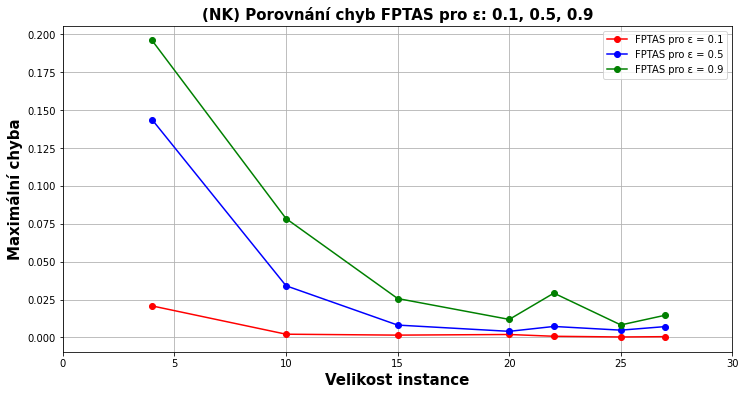

In [49]:
limit = 7
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, c.NUM_OF_THINGS[limit])

plt.title("(NK) Porovnání chyb FPTAS pro ε: 0.1, 0.5, 0.9", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Maximální chyba", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS[0:limit], f1_max_e[0:limit], marker = "o", linestyle = "solid", color = "red", label = "FPTAS pro ε = 0.1")
plt.plot(c.NUM_OF_THINGS[0:limit], f5_max_e[0:limit], marker = "o", linestyle = "solid", color = "blue", label = "FPTAS pro ε = 0.5")
plt.plot(c.NUM_OF_THINGS[0:limit], f9_max_e[0:limit], marker = "o", linestyle = "solid", color = "green", label = "FPTAS pro ε = 0.9")

plt.grid()
plt.legend()
plt.show()

In [50]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS[0:limit],
  "Maximální chyba pro FPTAS s ε = 0.1": f1_max_e[0:limit],
  "Maximální chyba pro FPTAS s ε = 0.5": f5_max_e[0:limit],
  "Maximální chyba pro FPTAS s ε = 0.9": f9_max_e[0:limit]
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Maximální chyba pro FPTAS s ε = 0.1,Maximální chyba pro FPTAS s ε = 0.5,Maximální chyba pro FPTAS s ε = 0.9
4,0.020790,0.143680,0.195930
10,0.002130,0.034090,0.078430
15,0.001520,0.008150,0.025670
20,0.001940,0.004020,0.011890
22,0.000760,0.007240,0.029230
25,0.000300,0.004800,0.008240
27,0.000510,0.007160,0.014680
